### Introduction
This project explores the complex protein interaction networks associated with Non-Small Cell Lung Cancer (NSCLC) using graph theory and network analysis techniques. Through rigorous data preparation, exploratory analysis, and network visualization, we identify key proteins and their interactions, assessing their roles and impacts within the network. Central to our analysis are the centrality measures that highlight crucial proteins potentially important in cancer biology and therapeutic targeting.

### Project Hierarchy and Steps Followed

#### 1. Importing Libraries and Loading Data
- Libraries such as Pandas, NumPy, NetworkX, and Matplotlib are imported to facilitate data manipulation, mathematical operations, network analysis, and visualization.
- Data is loaded from various sources including protein interaction datasets, functional annotations, and protein annotations.

#### 2. Data Preparation
- **Exploring Loaded Datasets**
  - **i. Protein Interaction Dataset:** Initial examination to understand the structure, columns, and types of interactions recorded.
  - **ii. Functional Annotations Dataset:** Analysis of functional data such as pathways and processes proteins are involved in.
  - **iii. Protein Annotations Dataset:** Review of annotations relating to the biological properties of proteins.
  - **iv. Node Degree Dataset:** Insights into the connectivity of proteins within the network.
  - **v. Key Finding:** Renaming columns to remove '#' from column names for better accessibility.
- **Merging Datasets**
  - **i. Merging Node Degrees:** Integration of node degree data with protein interaction data to enrich the dataset.
  - **ii. Merging Functional Annotations:** Incorporation of functional annotations to provide context to protein interactions.
  - **iii. Merging Protein Annotations:** Addition of biological annotations to enhance the dataset’s informational value.

#### 3. Preliminary Data Exploration
- Analysis of the merged dataset to identify trends, outliers, and key statistics that inform the subsequent analysis steps.

#### 4. Exploratory Data Analysis on Filtered Data
- **Pair Plot Analysis:** Visual exploration of relationships between node degrees, interaction scores, and other relevant metrics.
- **Boxplot of Interaction Scores:** Examination of the distribution of interaction scores to gauge the range and density of interactions.

#### 5. Network Construction with Edge Attributes
- Construction of a network graph where nodes represent proteins and edges depict interactions, with edge weights derived from combined interaction scores.

#### 6. Centrality Measures
- Calculation and analysis of various centrality metrics to identify influential proteins within the network:
  - **Degree Centrality:** Focus on proteins with the highest number of interactions.
  - **Closeness Centrality:** Highlighting proteins that can rapidly affect or be affected by other proteins.
  - **Betweenness Centrality:** Identifying key bridge proteins within the network.
  - **Eigenvector Centrality:** Emphasizing proteins that are connected to other well-connected proteins.

#### 7. Visualization
- Visual representation of the network to illustrate the centrality and connectivity of proteins, utilizing node size and color intensity to denote centrality.

#### 8. Conclusion
- Summarization of findings with a focus on key proteins, their roles in NSCLC, potential as therapeutic targets, and insights into the network’s structural vulnerabilities.
- Discussion of how these findings could guide further research and inform treatment strategies.


## Importing Libraries and Loading Data

In [1]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [2]:
pip install python-louvain

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Ignore specific future warnings
import seaborn as sns
from pyvis.network import Network

In [4]:
# Loading all datasets
data = pd.read_csv("/content/string_interactions.tsv", sep='\t')
func_annotations = pd.read_csv("/content/string_functional_annotations.tsv", sep='\t')
protein_annotations = pd.read_csv("/content/string_protein_annotations.tsv", sep='\t')
node_degree = pd.read_csv("/content/string_node_degrees.tsv", sep='\t')

In [5]:
# Creating a copy of the datasets for working on them -
df = data
func_df = func_annotations
protein_df = protein_annotations
degree_df = node_degree

## Data Preparation -

### 1. Exploring the loaded datasets -

#### a) Protein Interaction Dataset

In [6]:
df.columns

Index(['#node1', 'node2', 'node1_string_id', 'node2_string_id',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score'],
      dtype='object')

In [7]:
df.dtypes

#node1                                    object
node2                                     object
node1_string_id                           object
node2_string_id                           object
neighborhood_on_chromosome                 int64
gene_fusion                              float64
phylogenetic_cooccurrence                float64
homology                                 float64
coexpression                             float64
experimentally_determined_interaction    float64
database_annotated                       float64
automated_textmining                     float64
combined_score                           float64
dtype: object

In [8]:
df['#node1'].nunique()

68

In [9]:
df['#node1'].unique()

array(['AKT1', 'AKT2', 'AKT3', 'ALK', 'ARAF', 'BAD', 'BAK1', 'BAX',
       'BRAF', 'CASP9', 'CCND1', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN2A',
       'DDB2', 'E2F1', 'E2F2', 'E2F3', 'EGF', 'EGFR', 'EML4', 'ERBB2',
       'FHIT', 'FOXO3', 'GADD45A', 'GADD45B', 'GADD45G', 'GRB2', 'HGF',
       'HRAS', 'JAK3', 'KRAS', 'MAP2K1', 'MAP2K2', 'MAPK1', 'MAPK3',
       'MET', 'NRAS', 'PDPK1', 'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3R1',
       'PIK3R2', 'PIK3R3', 'PLCG1', 'PLCG2', 'POLK', 'PRKCA', 'PRKCB',
       'PRKCG', 'RAF1', 'RARB', 'RASSF1', 'RASSF5', 'RB1', 'RXRA', 'RXRB',
       'RXRG', 'SOS1', 'SOS2', 'STAT3', 'STAT5A', 'STAT5B', 'STK4',
       'TGFA', 'TP53'], dtype=object)

In [10]:
df["node2"].nunique()

68

In [11]:
df['node2'].unique()

array(['MAPK1', 'SOS2', 'PIK3R2', 'HGF', 'CCND1', 'PLCG1', 'KRAS', 'CDK4',
       'PIK3R3', 'E2F3', 'MAP2K2', 'MAPK3', 'PIK3CA', 'STAT3', 'EGF',
       'CDK6', 'RB1', 'TP53', 'ERBB2', 'EGFR', 'ARAF', 'BAX', 'STAT5B',
       'MAP2K1', 'MET', 'EML4', 'CASP9', 'FOXO3', 'STAT5A', 'PDPK1',
       'E2F1', 'RASSF1', 'E2F2', 'NRAS', 'GADD45A', 'BAK1', 'PIK3CD',
       'AKT2', 'GRB2', 'BAD', 'SOS1', 'CDKN1A', 'RAF1', 'TGFA', 'HRAS',
       'CDKN2A', 'BRAF', 'RXRA', 'PIK3R1', 'PRKCB', 'RASSF5', 'PLCG2',
       'AKT3', 'PIK3CB', 'AKT1', 'JAK3', 'PRKCG', 'PRKCA', 'ALK', 'FHIT',
       'GADD45B', 'GADD45G', 'DDB2', 'RARB', 'STK4', 'RXRG', 'RXRB',
       'POLK'], dtype=object)

#### b) Functional Annotations Dataset


In [12]:
func_df.head()

#node            identifier    category     term ID  \
0  AKT1  9606.ENSP00000451828  GO Process  GO:0000003   
1  AKT1  9606.ENSP00000451828  GO Process  GO:0000079   
2  AKT1  9606.ENSP00000451828  GO Process  GO:0000271   
3  AKT1  9606.ENSP00000451828  GO Process  GO:0000302   
4  AKT1  9606.ENSP00000451828  GO Process  GO:0001503   

                                    term description  
0                                       Reproduction  
1  Regulation of cyclin-dependent protein serine/...  
2                Polysaccharide biosynthetic process  
3                Response to reactive oxygen species  
4                                       Ossification

In [13]:
func_df.columns

Index(['#node', 'identifier', 'category', 'term ID', 'term description'], dtype='object')

In [14]:
func_df.size

235590

In [15]:
func_df.dtypes

#node               object
identifier          object
category            object
term ID             object
term description    object
dtype: object

In [16]:
func_df['category'].unique()

array(['GO Process', 'GO Function', 'GO Component', 'STRING clusters',
       'KEGG', 'Reactome', 'WikiPathways', 'DISEASES', 'TISSUES',
       'COMPARTMENTS', 'Monarch', 'UniProt Keywords', 'InterPro', 'SMART',
       'Pfam'], dtype=object)

In [17]:
func_df['#node'].nunique()

68

In [18]:
func_df.describe()

#node            identifier    category     term ID term description
count   47118                 47118       47118       47118            47118
unique     68                    68          15        9268             8788
top      AKT1  9606.ENSP00000451828  GO Process  GO:0110165        Cytoplasm
freq     2199                  2199       15348          68              157

In [19]:
func_df.isna().sum()

#node               0
identifier          0
category            0
term ID             0
term description    0
dtype: int64

#### c) Protein Annotations Dataset

In [20]:
protein_df.head()

#node            identifier  \
0  AKT1  9606.ENSP00000451828   
1  AKT2  9606.ENSP00000375892   
2  AKT3  9606.ENSP00000500582   
3   ALK  9606.ENSP00000373700   
4  ARAF  9606.ENSP00000290277   

                                  domain_summary_url  \
0  RAC-alpha serine/threonine-protein kinase; AKT...   
1  RAC-beta serine/threonine-protein kinase; AKT2...   
2  RAC-gamma serine/threonine-protein kinase; AKT...   
3  ALK tyrosine kinase receptor; Neuronal recepto...   
4  Serine/threonine-protein kinase A-Raf; Involve...   

                                          annotation  \
0  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
1  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
2  https://smart.embl.de/smart/DDvec.cgi?smart=47...   
3  https://smart.embl.de/smart/DDvec.cgi?smart=16...   
4  https://smart.embl.de/smart/DDvec.cgi?smart=60...   

                             other_names_and_aliases  
0  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  
1  1GZK,1GZN,1GZO,1MRV,1MRY,1O6K,1O6L,1P6S,2.7.11...  
2  10000,2.7.11.1,2X18,AAD24196.1,AAD29089.1,AAF9...  
3  2.7.10.1,238,2KUP,2KUQ,2XB7,2XBA,2XP2,2YFX,2YH...  
4  1WXM,2.7.11.1,2MSE,369,A-RAF,A-Raf proto-oncog...

In [21]:
protein_df.columns

Index(['#node', 'identifier', 'domain_summary_url', 'annotation',
       'other_names_and_aliases'],
      dtype='object')

In [22]:
protein_df.dtypes

#node                      object
identifier                 object
domain_summary_url         object
annotation                 object
other_names_and_aliases    object
dtype: object

In [23]:
protein_df['#node'].nunique()

68

In [24]:
protein_df.describe()

#node            identifier  \
count     68                    68   
unique    68                    68   
top     AKT1  9606.ENSP00000451828   
freq       1                     1   

                                       domain_summary_url  \
count                                                  68   
unique                                                 68   
top     RAC-alpha serine/threonine-protein kinase; AKT...   
freq                                                    1   

                                               annotation  \
count                                                  68   
unique                                                 66   
top     https://smart.embl.de/smart/DDvec.cgi?smart=18...   
freq                                                    3   

                                  other_names_and_aliases  
count                                                  68  
unique                                                 68  
top     1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  
freq                                                    1

In [25]:
protein_df.isna().sum()

#node                      0
identifier                 0
domain_summary_url         0
annotation                 0
other_names_and_aliases    0
dtype: int64

#### d) Node Degree Dataset


In [26]:
degree_df.head(15)

#node            identifier  node_degree
0     AKT1  9606.ENSP00000451828           54
1     AKT2  9606.ENSP00000375892           28
2     AKT3  9606.ENSP00000500582           26
3      ALK  9606.ENSP00000373700           29
4     ARAF  9606.ENSP00000290277           23
5      BAD  9606.ENSP00000378040           14
6     BAK1  9606.ENSP00000363591            6
7      BAX  9606.ENSP00000293288           11
8     BRAF  9606.ENSP00000419060           39
9    CASP9  9606.ENSP00000330237           31
10   CCND1  9606.ENSP00000227507           42
11    CDK4  9606.ENSP00000257904           33
12    CDK6  9606.ENSP00000265734           24
13  CDKN1A  9606.ENSP00000384849           38
14  CDKN2A  9606.ENSP00000418915           43

In [27]:
degree_df.columns

Index(['#node', 'identifier', 'node_degree'], dtype='object')

In [28]:
degree_df.dtypes

#node          object
identifier     object
node_degree     int64
dtype: object

In [29]:
degree_df['node_degree'].size

68

In [30]:
degree_df.describe()

node_degree
count    68.000000
mean     26.205882
std      14.319967
min       1.000000
25%      15.500000
50%      25.000000
75%      38.000000
max      59.000000

In [31]:
degree_df.isna().sum()

#node          0
identifier     0
node_degree    0
dtype: int64

#### We can observe that in every dataset, the starting column name has a '#' in front of it. We could rename all the first columns by removing this symbol for their better accessibility.

In [32]:
# Function to remove '#' from column names
def clean_column_names(df):
    df.columns = df.columns.str.replace('#', '', regex=False)
    return df

In [33]:
# Applying the function to each copied dataset
df = clean_column_names(df)
func_df = clean_column_names(func_df)
protein_df = clean_column_names(protein_df)
degree_df = clean_column_names(degree_df)

**Displaying the first five rows of dataset to verify changes:**

In [34]:
print("Data - First 5 Rows:")
df.head()

Data - First 5 Rows:


node1   node2       node1_string_id       node2_string_id  \
0  AKT1   MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1    SOS2  9606.ENSP00000451828  9606.ENSP00000216373   
2  AKT1  PIK3R2  9606.ENSP00000451828  9606.ENSP00000222254   
3  AKT1     HGF  9606.ENSP00000451828  9606.ENSP00000222390   
4  AKT1   CCND1  9606.ENSP00000451828  9606.ENSP00000227507   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  \
0     0.593         0.118                                  0.110   
1     0.000         0.073                                  0.084   
2     0.000         0.128                                  0.093   
3     0.000         0.000                                  0.096   
4     0.000         0.088                                  0.000   

   database_annotated  automated_textmining  combined_score  
0                 0.9                 0.872           0.988  
1                 0.0                 0.567           0.601  
2                 0.9                 0.677           0.971  
3                 0.5                 0.761           0.882  
4                 0.0                 0.919           0.923

In [35]:
print("Functional Annotations - First 5 Rows:")
func_df.head()

Functional Annotations - First 5 Rows:


node            identifier    category     term ID  \
0  AKT1  9606.ENSP00000451828  GO Process  GO:0000003   
1  AKT1  9606.ENSP00000451828  GO Process  GO:0000079   
2  AKT1  9606.ENSP00000451828  GO Process  GO:0000271   
3  AKT1  9606.ENSP00000451828  GO Process  GO:0000302   
4  AKT1  9606.ENSP00000451828  GO Process  GO:0001503   

                                    term description  
0                                       Reproduction  
1  Regulation of cyclin-dependent protein serine/...  
2                Polysaccharide biosynthetic process  
3                Response to reactive oxygen species  
4                                       Ossification

In [36]:
print("Protein Annotations - First 5 Rows:")
protein_df.head()

Protein Annotations - First 5 Rows:


node            identifier  \
0  AKT1  9606.ENSP00000451828   
1  AKT2  9606.ENSP00000375892   
2  AKT3  9606.ENSP00000500582   
3   ALK  9606.ENSP00000373700   
4  ARAF  9606.ENSP00000290277   

                                  domain_summary_url  \
0  RAC-alpha serine/threonine-protein kinase; AKT...   
1  RAC-beta serine/threonine-protein kinase; AKT2...   
2  RAC-gamma serine/threonine-protein kinase; AKT...   
3  ALK tyrosine kinase receptor; Neuronal recepto...   
4  Serine/threonine-protein kinase A-Raf; Involve...   

                                          annotation  \
0  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
1  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
2  https://smart.embl.de/smart/DDvec.cgi?smart=47...   
3  https://smart.embl.de/smart/DDvec.cgi?smart=16...   
4  https://smart.embl.de/smart/DDvec.cgi?smart=60...   

                             other_names_and_aliases  
0  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  
1  1GZK,1GZN,1GZO,1MRV,1MRY,1O6K,1O6L,1P6S,2.7.11...  
2  10000,2.7.11.1,2X18,AAD24196.1,AAD29089.1,AAF9...  
3  2.7.10.1,238,2KUP,2KUQ,2XB7,2XBA,2XP2,2YFX,2YH...  
4  1WXM,2.7.11.1,2MSE,369,A-RAF,A-Raf proto-oncog...

In [37]:
print("Node Degree - First 5 Rows:")
degree_df.head()

Node Degree - First 5 Rows:


node            identifier  node_degree
0  AKT1  9606.ENSP00000451828           54
1  AKT2  9606.ENSP00000375892           28
2  AKT3  9606.ENSP00000500582           26
3   ALK  9606.ENSP00000373700           29
4  ARAF  9606.ENSP00000290277           23

***Based on the above peek at all the datasets and their aspects -***

### 2. Merging Datasets -


#### a) Merging Node Degrees:

In [38]:
# Merging node degrees for node1
df = df.merge(degree_df, how='left', left_on='node1_string_id', right_on='identifier', suffixes=('', '_deg1'))
df.rename(columns={'node_degree': 'node1_degree'}, inplace=True)

In [39]:
# Merging node degrees for node2
df = df.merge(degree_df, how='left', left_on='node2_string_id', right_on='identifier', suffixes=('', '_deg2'))
df.rename(columns={'node_degree': 'node2_degree'}, inplace=True)

In [40]:
df.head()

node1   node2       node1_string_id       node2_string_id  \
0  AKT1   MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1    SOS2  9606.ENSP00000451828  9606.ENSP00000216373   
2  AKT1  PIK3R2  9606.ENSP00000451828  9606.ENSP00000222254   
3  AKT1     HGF  9606.ENSP00000451828  9606.ENSP00000222390   
4  AKT1   CCND1  9606.ENSP00000451828  9606.ENSP00000227507   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  \
0     0.593         0.118                                  0.110   
1     0.000         0.073                                  0.084   
2     0.000         0.128                                  0.093   
3     0.000         0.000                                  0.096   
4     0.000         0.088                                  0.000   

   database_annotated  automated_textmining  combined_score  node  \
0                 0.9                 0.872           0.988  AKT1   
1                 0.0                 0.567           0.601  AKT1   
2                 0.9                 0.677           0.971  AKT1   
3                 0.5                 0.761           0.882  AKT1   
4                 0.0                 0.919           0.923  AKT1   

             identifier  node1_degree node_deg2       identifier_deg2  \
0  9606.ENSP00000451828            54     MAPK1  9606.ENSP00000215832   
1  9606.ENSP00000451828            54      SOS2  9606.ENSP00000216373   
2  9606.ENSP00000451828            54    PIK3R2  9606.ENSP00000222254   
3  9606.ENSP00000451828            54       HGF  9606.ENSP00000222390   
4  9606.ENSP00000451828            54     CCND1  9606.ENSP00000227507   

   node2_degree  
0            39  
1            22  
2            28  
3            25  
4            42

In [41]:
# Checking for matching 'node1_string_id' and 'identifier_deg1'
node1_check = ((df['node1_string_id'] == df['identifier']) & (df['node1'] == df['node'])).all()
print("Node1 merging accuracy:", node1_check)

# Checking for matching 'node2_string_id' and 'identifier_deg2'
node2_check = ((df['node2_string_id'] == df['identifier_deg2']) & (df['node2'] == df['node_deg2']) ).all()
print("Node2 merging accuracy:", node2_check)


Node1 merging accuracy: True
Node2 merging accuracy: True


**Inference -** As we can see, the merging accuracy, considering the Node Names and their Identifier names, is True in both scenarios, which means that we can proceed with dropping the redundant columns confidently as the new Node degree information has been added to the datapoints of the Protein-Interaction Dataset accurately as per the corresponding nodes.

In [42]:
# Dropping redundant columns
df.drop(['identifier', 'identifier_deg2', 'node', 'node_deg2'], axis=1, inplace=True)

#### b) Merging Functional Annotations:

In [43]:
# Filtering for KEGG pathways before merging
kegg_df = func_df[func_df['category'] == 'KEGG']

In [44]:
# Merging KEGG functional annotations for node1
df = pd.merge(df, kegg_df[['node', 'identifier', 'term description']], how='left', left_on=['node1', 'node1_string_id'], right_on=['node', 'identifier'], suffixes=('', '_node1'))
df.rename(columns={'term description': 'node1_kegg_function'}, inplace=True)

In [45]:
# Merging KEGG functional annotations for node2
df = pd.merge(df, kegg_df[['node', 'identifier', 'term description']], how='left', left_on=['node2', 'node2_string_id'], right_on=['node', 'identifier'], suffixes=('', '_node2'))
df.rename(columns={'term description': 'node2_kegg_function'}, inplace=True)

In [46]:
df.head()

node1  node2       node1_string_id       node2_string_id  \
0  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
2  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
3  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
4  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  ...  \
0     0.593         0.118                                   0.11  ...   
1     0.593         0.118                                   0.11  ...   
2     0.593         0.118                                   0.11  ...   
3     0.593         0.118                                   0.11  ...   
4     0.593         0.118                                   0.11  ...   

   automated_textmining  combined_score  node1_degree  node2_degree  node  \
0                 0.872           0.988            54            39  AKT1   
1                 0.872           0.988            54            39  AKT1   
2                 0.872           0.988            54            39  AKT1   
3                 0.872           0.988            54            39  AKT1   
4                 0.872           0.988            54            39  AKT1   

             identifier                        node1_kegg_function node_node2  \
0  9606.ENSP00000451828  EGFR tyrosine kinase inhibitor resistance      MAPK1   
1  9606.ENSP00000451828  EGFR tyrosine kinase inhibitor resistance      MAPK1   
2  9606.ENSP00000451828  EGFR tyrosine kinase inhibitor resistance      MAPK1   
3  9606.ENSP00000451828  EGFR tyrosine kinase inhibitor resistance      MAPK1   
4  9606.ENSP00000451828  EGFR tyrosine kinase inhibitor resistance      MAPK1   

       identifier_node2                        node2_kegg_function  
0  9606.ENSP00000215832  EGFR tyrosine kinase inhibitor resistance  
1  9606.ENSP00000215832                       Endocrine resistance  
2  9606.ENSP00000215832                   Platinum drug resistance  
3  9606.ENSP00000215832                     MAPK signaling pathway  
4  9606.ENSP00000215832                     ErbB signaling pathway  

[5 rows x 21 columns]

In [47]:
print(df.head())

  node1  node2       node1_string_id       node2_string_id  \
0  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
2  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
3  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
4  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  ...  \
0     0.593         0.118                                   0.11  ...   
1     0.593         0.118                 

In [48]:
df['node2_kegg_function'].unique()

array(['EGFR tyrosine kinase inhibitor resistance',
       'Endocrine resistance', 'Platinum drug resistance',
       'MAPK signaling pathway', 'ErbB signaling pathway',
       'Ras signaling pathway', 'Rap1 signaling pathway',
       'cGMP-PKG signaling pathway', 'cAMP signaling pathway',
       'Chemokine signaling pathway', 'HIF-1 signaling pathway',
       'FoxO signaling pathway', 'Sphingolipid signaling pathway',
       'Phospholipase D signaling pathway', 'Oocyte meiosis',
       'Autophagy - animal', 'mTOR signaling pathway',
       'PI3K-Akt signaling pathway', 'Apoptosis', 'Cellular senescence',
       'Adrenergic signaling in cardiomyocytes',
       'Vascular smooth muscle contraction', 'TGF-beta signaling pathway',
       'Axon guidance', 'VEGF signaling pathway',
       'Apelin signaling pathway', 'Osteoclast differentiation',
       'Focal adhesion', 'Adherens junction', 'Gap junction',
       'Signaling pathways regulating pluripotency of stem cells',
       'Platelet ac

In [49]:
# Verifying the accuracy of the merging process
merge_accuracy_node1 = ((df['node1_string_id'] == df['identifier']) & (df['node1'] == df['node'])).all()
merge_accuracy_node2 = ((df['node2_string_id'] == df['identifier_node2']) & (df['node2'] == df['node_node2'])).all()

print("Merging accuracy for Node 1 KEGG annotations:", merge_accuracy_node1)
print("Merging accuracy for Node 2 KEGG annotations:", merge_accuracy_node2)

Merging accuracy for Node 1 KEGG annotations: True
Merging accuracy for Node 2 KEGG annotations: True


**Inference -** We can see that the Merging Accuracy of the KEGG Annotation data in terms of The columns `node1`, `node2`, `node1_string_id`-> **Node1 Identifier**s and `node2_string_id`-> **Node2 Identifiers** is true. <br>
We can now proceed to drop the redundant columns - `node`, `node_node2`, `identifier` and `identifier_node2` since they were used as keys for merging and do not contribute additional information.

In [50]:
# Dropping unnecessary columns
df.drop(columns=['node', 'node_node2','identifier','identifier_node2'], inplace=True)

In [51]:
# Displaying the cleaned DataFrame to review changes
df.head()

node1  node2       node1_string_id       node2_string_id  \
0  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
2  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
3  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
4  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  \
0     0.593         0.118                                   0.11   
1     0.593         0.118                                   0.11   
2     0.593         0.118                                   0.11   
3     0.593         0.118                                   0.11   
4     0.593         0.118                                   0.11   

   database_annotated  automated_textmining  combined_score  node1_degree  \
0                 0.9                 0.872           0.988            54   
1                 0.9                 0.872           0.988            54   
2                 0.9                 0.872           0.988            54   
3                 0.9                 0.872           0.988            54   
4                 0.9                 0.872           0.988            54   

   node2_degree                        node1_kegg_function  \
0            39  EGFR tyrosine kinase inhibitor resistance   
1            39  EGFR tyrosine kinase inhibitor resistance   
2            39  EGFR tyrosine kinase inhibitor resistance   
3            39  EGFR tyrosine kinase inhibitor resistance   
4            39  EGFR tyrosine kinase inhibitor resistance   

                         node2_kegg_function  
0  EGFR tyrosine kinase inhibitor resistance  
1                       Endocrine resistance  
2                   Platinum drug resistance  
3                     MAPK signaling pathway  
4                     ErbB signaling pathway

#### c) Merging Protein Annotations:

In [52]:
# Merging protein annotations for node1
df = pd.merge(
    df,
    protein_df[['node', 'identifier', 'annotation', 'domain_summary_url', 'other_names_and_aliases']],
    how='left',
    left_on='node1_string_id',
    right_on='identifier',
    suffixes=('', '_protein1')
)

# Print columns to verify names
print("Columns after first merge:", df.columns)


Columns after first merge: Index(['node1', 'node2', 'node1_string_id', 'node2_string_id',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score', 'node1_degree',
       'node2_degree', 'node1_kegg_function', 'node2_kegg_function', 'node',
       'identifier', 'annotation', 'domain_summary_url',
       'other_names_and_aliases'],
      dtype='object')


In [53]:
# Merging protein annotations for node2
df = pd.merge(
    df,
    protein_df[['node', 'identifier', 'annotation', 'domain_summary_url', 'other_names_and_aliases']],
    how='left',
    left_on='node2_string_id',
    right_on='identifier',
    suffixes=('', '_protein2')
)

In [54]:
# Print columns to verify names
print("Columns after Second merge:", df.columns)

Columns after Second merge: Index(['node1', 'node2', 'node1_string_id', 'node2_string_id',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score', 'node1_degree',
       'node2_degree', 'node1_kegg_function', 'node2_kegg_function', 'node',
       'identifier', 'annotation', 'domain_summary_url',
       'other_names_and_aliases', 'node_protein2', 'identifier_protein2',
       'annotation_protein2', 'domain_summary_url_protein2',
       'other_names_and_aliases_protein2'],
      dtype='object')


In [55]:
df.head()

node1  node2       node1_string_id       node2_string_id  \
0  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
2  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
3  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
4  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  ...  node  \
0     0.593         0.118                                   0.11  ...  AKT1   
1     0.593         0.118                                   0.11  ...  AKT1   
2     0.593         0.118                                   0.11  ...  AKT1   
3     0.593         0.118                                   0.11  ...  AKT1   
4     0.593         0.118                                   0.11  ...  AKT1   

             identifier                                         annotation  \
0  9606.ENSP00000451828  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
1  9606.ENSP00000451828  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
2  9606.ENSP00000451828  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
3  9606.ENSP00000451828  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
4  9606.ENSP00000451828  https://smart.embl.de/smart/DDvec.cgi?smart=48...   

                                  domain_summary_url  \
0  RAC-alpha serine/threonine-protein kinase; AKT...   
1  RAC-alpha serine/threonine-protein kinase; AKT...   
2  RAC-alpha serine/threonine-protein kinase; AKT...   
3  RAC-alpha serine/threonine-protein kinase; AKT...   
4  RAC-alpha serine/threonine-protein kinase; AKT...   

                             other_names_and_aliases node_protein2  \
0  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...         MAPK1   
1  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...         MAPK1   
2  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...         MAPK1   
3  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...         MAPK1   
4  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...         MAPK1   

    identifier_protein2                                annotation_protein2  \
0  9606.ENSP00000215832  https://smart.embl.de/smart/DDvec.cgi?smart=36...   
1  9606.ENSP00000215832  https://smart.embl.de/smart/DDvec.cgi?smart=36...   
2  9606.ENSP00000215832  https://smart.embl.de/smart/DDvec.cgi?smart=36...   
3  9606.ENSP00000215832  https://smart.embl.de/smart/DDvec.cgi?smart=36...   
4  9606.ENSP00000215832  https://smart.embl.de/smart/DDvec.cgi?smart=36...   

                         domain_summary_url_protein2  \
0  Mitogen-activated protein kinase 1; Serine/thr...   
1  Mitogen-activated protein kinase 1; Serine/thr...   
2  Mitogen-activated protein kinase 1; Serine/thr...   
3  Mitogen-activated protein kinase 1; Serine/thr...   
4  Mitogen-activated protein kinase 1; Serine/thr...   

                    other_names_and_aliases_protein2  
0  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...  
1  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...  
2  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...  
3  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...  
4  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...  

[5 rows x 27 columns]

In [56]:
print(df.head())

  node1  node2       node1_string_id       node2_string_id  \
0  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
1  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
2  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
3  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   
4  AKT1  MAPK1  9606.ENSP00000451828  9606.ENSP00000215832   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                           0          0.0                        0.0   
1                           0          0.0                        0.0   
2                           0          0.0                        0.0   
3                           0          0.0                        0.0   
4                           0          0.0                        0.0   

   homology  coexpression  experimentally_determined_interaction  ...  node  \
0     0.593         0.118                                   0.11  ...  AKT1   
1     0.593         0.118     

In [57]:
# Verifying the accuracy of the merging process for protein annotations
merge_accuracy_node1_protein = ((df['node1_string_id'] == df['identifier']) & (df['node1'] == df['node'])).all()
merge_accuracy_node2_protein = ((df['node2_string_id'] == df['identifier_protein2']) & (df['node2'] == df['node_protein2'])).all()

print("Merging accuracy for Node 1 protein annotations:", merge_accuracy_node1_protein)
print("Merging accuracy for Node 2 protein annotations:", merge_accuracy_node2_protein)



Merging accuracy for Node 1 protein annotations: True
Merging accuracy for Node 2 protein annotations: True


**Inference -** We can see that the merging accuracy for protein annotations dataset is true in terms of both the node values. Now we could successfully proceed to dropping the `identifier`, `identifier_protein2`, `node` and `node_protein2` as they are redundant values.

Also, we can see that the column names for Node-1 data post merging don't explicitely mention they are of Node-1, let's rename the data columns for better readability and recognition. Also, to unify the way teh naming is done, we will rename all added columns post merging in one format.

We will also be re-arranging out dataset for better accessibility and readability od the data.

So we will primarily be doing he following next -
1. Dropping Unnecessary Columns
2. Renaming Column Names
3. Rearranging the dataset columns

In [58]:
# Dropping unnecessary columns
df.drop(columns=['identifier', 'identifier_protein2', 'node', 'node_protein2'], inplace=True)

In [59]:
# Renaming Column names for node-1
df.rename(columns={
    'annotation': 'node1_annotation',
    'domain_summary_url': 'node1_domain_url',
    'other_names_and_aliases': 'node1_aliases'
}, inplace=True)

# Renaming Column names for node-1
df.rename(columns={
    'annotation_protein2': 'node2_annotation',
    'domain_summary_url_protein2': 'node2_domain_url',
    'other_names_and_aliases_protein2': 'node2_aliases'
}, inplace=True)

In [60]:
# Rearranging the dataset
# Define the new order of columns
column_order = [
    'node1', 'node1_string_id', 'node1_degree', 'node1_kegg_function',
    'node1_annotation', 'node1_domain_url', 'node1_aliases',
    'node2', 'node2_string_id', 'node2_degree', 'node2_kegg_function',
    'node2_annotation', 'node2_domain_url', 'node2_aliases',
    'neighborhood_on_chromosome', 'gene_fusion',
    'phylogenetic_cooccurrence', 'homology', 'coexpression',
    'experimentally_determined_interaction', 'database_annotated',
    'automated_textmining', 'combined_score'
]

# Reorder the columns in the DataFrame
df = df[column_order]


In [61]:
# Displaying the DataFrame to review changes
df.head()

node1       node1_string_id  node1_degree  \
0  AKT1  9606.ENSP00000451828            54   
1  AKT1  9606.ENSP00000451828            54   
2  AKT1  9606.ENSP00000451828            54   
3  AKT1  9606.ENSP00000451828            54   
4  AKT1  9606.ENSP00000451828            54   

                         node1_kegg_function  \
0  EGFR tyrosine kinase inhibitor resistance   
1  EGFR tyrosine kinase inhibitor resistance   
2  EGFR tyrosine kinase inhibitor resistance   
3  EGFR tyrosine kinase inhibitor resistance   
4  EGFR tyrosine kinase inhibitor resistance   

                                    node1_annotation  \
0  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
1  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
2  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
3  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
4  https://smart.embl.de/smart/DDvec.cgi?smart=48...   

                                    node1_domain_url  \
0  RAC-alpha serine/threonine-protein kinase; AKT...   
1  RAC-alpha serine/threonine-protein kinase; AKT...   
2  RAC-alpha serine/threonine-protein kinase; AKT...   
3  RAC-alpha serine/threonine-protein kinase; AKT...   
4  RAC-alpha serine/threonine-protein kinase; AKT...   

                                       node1_aliases  node2  \
0  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
1  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
2  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
3  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
4  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   

        node2_string_id  node2_degree  ...  \
0  9606.ENSP00000215832            39  ...   
1  9606.ENSP00000215832            39  ...   
2  9606.ENSP00000215832            39  ...   
3  9606.ENSP00000215832            39  ...   
4  9606.ENSP00000215832            39  ...   

                                       node2_aliases  \
0  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
1  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
2  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
3  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
4  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   

  neighborhood_on_chromosome gene_fusion phylogenetic_cooccurrence  homology  \
0                          0         0.0                       0.0     0.593   
1                          0         0.0                       0.0     0.593   
2                          0         0.0                       0.0     0.593   
3                          0         0.0                       0.0     0.593   
4                          0         0.0                       0.0     0.593   

   coexpression  experimentally_determined_interaction  database_annotated  \
0         0.118                                   0.11                 0.9   
1         0.118                                   0.11                 0.9   
2         0.118                                   0.11                 0.9   
3         0.118                                   0.11                 0.9   
4         0.118                                   0.11                 0.9   

   automated_textmining  combined_score  
0                 0.872           0.988  
1                 0.872           0.988  
2                 0.872           0.988  
3                 0.872           0.988  
4                 0.872           0.988  

[5 rows x 23 columns]

**Now that we have obtained out merged dataset, let's have a look at the structure of the merged dataset and do some preliminary Data Exploration on it.**

### 3.  Preliminary Data Exploration on merged dataset-

In [62]:
df.columns

Index(['node1', 'node1_string_id', 'node1_degree', 'node1_kegg_function',
       'node1_annotation', 'node1_domain_url', 'node1_aliases', 'node2',
       'node2_string_id', 'node2_degree', 'node2_kegg_function',
       'node2_annotation', 'node2_domain_url', 'node2_aliases',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score'],
      dtype='object')

In [63]:
# Checking for null values
print(df.isnull().sum())


node1                                    0
node1_string_id                          0
node1_degree                             0
node1_kegg_function                      0
node1_annotation                         0
node1_domain_url                         0
node1_aliases                            0
node2                                    0
node2_string_id                          0
node2_degree                             0
node2_kegg_function                      0
node2_annotation                         0
node2_domain_url                         0
node2_aliases                            0
neighborhood_on_chromosome               0
gene_fusion                              0
phylogenetic_cooccurrence                0
homology                                 0
coexpression                             0
experimentally_determined_interaction    0
database_annotated                       0
automated_textmining                     0
combined_score                           0
dtype: int6

In [64]:
# Data Type Verification
print(df.dtypes)


node1                                     object
node1_string_id                           object
node1_degree                               int64
node1_kegg_function                       object
node1_annotation                          object
node1_domain_url                          object
node1_aliases                             object
node2                                     object
node2_string_id                           object
node2_degree                               int64
node2_kegg_function                       object
node2_annotation                          object
node2_domain_url                          object
node2_aliases                             object
neighborhood_on_chromosome                 int64
gene_fusion                              float64
phylogenetic_cooccurrence                float64
homology                                 float64
coexpression                             float64
experimentally_determined_interaction    float64
database_annotated  

In [65]:
# Descriptive statistics for categorical features
df.describe(include='object')


node1       node1_string_id         node1_kegg_function  \
count   4982464               4982464                     4982464   
unique       68                    68                         180   
top       MAPK3  9606.ENSP00000263025  Non-small cell lung cancer   
freq     251304                251304                       92964   

                                         node1_annotation  \
count                                             4982464   
unique                                                 66   
top     https://smart.embl.de/smart/DDvec.cgi?smart=18...   
freq                                               569428   

                                         node1_domain_url  \
count                                             4982464   
unique                                                 68   
top     Mitogen-activated protein kinase 3; Serine/thr...   
freq                                               251304   

                                            node1_aliases    node2  \
count                                             4982464  4982464   
unique                                                 68       68   
top     2.7.11.1,2.7.11.24,2ZOQ,4QTB,5595,6GES,A8CZ58,...    MAPK3   
freq                                               251304   251304   

             node2_string_id         node2_kegg_function  \
count                4982464                     4982464   
unique                    68                         180   
top     9606.ENSP00000263025  Non-small cell lung cancer   
freq                  251304                       92964   

                                         node2_annotation  \
count                                             4982464   
unique                                                 66   
top     https://smart.embl.de/smart/DDvec.cgi?smart=18...   
freq                                               569428   

                                         node2_domain_url  \
count                                             4982464   
unique                                                 68   
top     Mitogen-activated protein kinase 3; Serine/thr...   
freq                                               251304   

                                            node2_aliases  
count                                             4982464  
unique                                                 68  
top     2.7.11.1,2.7.11.24,2ZOQ,4QTB,5595,6GES,A8CZ58,...  
freq                                               251304

In [66]:
# Descriptive statistics for numerical features
print(df.describe())

       node1_degree  node2_degree  neighborhood_on_chromosome   gene_fusion  \
count  4.982464e+06  4.982464e+06                   4982464.0  4.982464e+06   
mean   3.641194e+01  3.641194e+01                         0.0  4.099177e-06   
std    1.142344e+01  1.142344e+01                         0.0  6.389346e-05   
min    1.000000e+00  1.000000e+00                         0.0  0.000000e+00   
25%    2.800000e+01  2.800000e+01                         0.0  0.000000e+00   
50%    3.800000e+01  3.800000e+01                         0.0  0.000000e+00   
75%    4.400000e+01  4.400000e+01                         0.0  0.000000e+00   
max    5.900000e+01  5.900000e+01                         0.0  1.000000e-03   

       phylogenetic_cooccurrence      homology  coexpression  \
count               4.982464e+06  4.982464e+06  4.982464e+06   
mean                5.667717e-03  1.518912e-01  6.369321e-02   
std                 2.128030e-02  2.983831e-01  6.178272e-02   
min                 0.000000e+00

In [67]:
# Size of the dataset
print("Dataset size:", df.shape)


Dataset size: (4982464, 23)


In [68]:
# Checking for Duplicate Rows
print("Duplicate rows:", df.duplicated().sum())
# df.drop_duplicates(inplace=True)  # Remove duplicates if any


Duplicate rows: 0


In [69]:
# Exploration of Unique Values
def print_unique(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        unique_count = len(unique_values)
        # Optionally display up to the first 10 unique values for brevity
        unique_display = unique_values[:10] if unique_count > 10 else unique_values
        print(f"Column '{column}' has {unique_count} unique values.")
        print(f"Sample unique values (up to 10): {unique_display}\n")


print_unique(df)


Column 'node1' has 68 unique values.
Sample unique values (up to 10): ['AKT1' 'AKT2' 'AKT3' 'ALK' 'ARAF' 'BAD' 'BAK1' 'BAX' 'BRAF' 'CASP9']

Column 'node1_string_id' has 68 unique values.
Sample unique values (up to 10): ['9606.ENSP00000451828' '9606.ENSP00000375892' '9606.ENSP00000500582'
 '9606.ENSP00000373700' '9606.ENSP00000290277' '9606.ENSP00000378040'
 '9606.ENSP00000363591' '9606.ENSP00000293288' '9606.ENSP00000419060'
 '9606.ENSP00000330237']

Column 'node1_degree' has 41 unique values.
Sample unique values (up to 10): [54 28 26 29 23 14  6 11 39 31]

Column 'node1_kegg_function' has 180 unique values.
Sample unique values (up to 10): ['EGFR tyrosine kinase inhibitor resistance' 'Endocrine resistance'
 'Platinum drug resistance' 'MAPK signaling pathway'
 'ErbB signaling pathway' 'Ras signaling pathway' 'Rap1 signaling pathway'
 'cGMP-PKG signaling pathway' 'cAMP signaling pathway'
 'Chemokine signaling pathway']

Column 'node1_annotation' has 66 unique values.
Sample unique va

**Before EDA, let's simplify the dataset we are working on even more. As we can see that the current merged dataset consists of approximately 5 Million rows and 23 columns of data. This data, considering most of which is irrelevant to the topic we are mainly wanting to shed light on - Non Small Cell Lung Cancer, will consume a lot of time and memory for analyses. Hence, taking a simpler approach, we will now -**


### 4. Extract KEGG Functionalities focusing oon `Non-small cell lung cancer` only:

In [70]:
# Filter for Non-Small Cell Lung Cancer interactions
nslc_interactions = df[(df['node1_kegg_function'] == 'Non-small cell lung cancer') |
                       (df['node2_kegg_function'] == 'Non-small cell lung cancer')]

# Display the filtered dataframe
print(nslc_interactions)

        node1       node1_string_id  node1_degree  \
104      AKT1  9606.ENSP00000451828            54   
215      AKT1  9606.ENSP00000451828            54   
326      AKT1  9606.ENSP00000451828            54   
437      AKT1  9606.ENSP00000451828            54   
548      AKT1  9606.ENSP00000451828            54   
...       ...                   ...           ...   
4982390  TP53  9606.ENSP00000269305            59   
4982408  TP53  9606.ENSP00000269305            59   
4982426  TP53  9606.ENSP00000269305            59   
4982444  TP53  9606.ENSP00000269305            59   
4982462  TP53  9606.ENSP00000269305            59   

                               node1_kegg_function  \
104      EGFR tyrosine kinase inhibitor resistance   
215                           Endocrine resistance   
326                       Platinum drug resistance   
437                         MAPK signaling pathway   
548                         ErbB signaling pathway   
...                                    

In [71]:
nslc_interactions.head()

node1       node1_string_id  node1_degree  \
104  AKT1  9606.ENSP00000451828            54   
215  AKT1  9606.ENSP00000451828            54   
326  AKT1  9606.ENSP00000451828            54   
437  AKT1  9606.ENSP00000451828            54   
548  AKT1  9606.ENSP00000451828            54   

                           node1_kegg_function  \
104  EGFR tyrosine kinase inhibitor resistance   
215                       Endocrine resistance   
326                   Platinum drug resistance   
437                     MAPK signaling pathway   
548                     ErbB signaling pathway   

                                      node1_annotation  \
104  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
215  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
326  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
437  https://smart.embl.de/smart/DDvec.cgi?smart=48...   
548  https://smart.embl.de/smart/DDvec.cgi?smart=48...   

                                      node1_domain_url  \
104  RAC-alpha serine/threonine-protein kinase; AKT...   
215  RAC-alpha serine/threonine-protein kinase; AKT...   
326  RAC-alpha serine/threonine-protein kinase; AKT...   
437  RAC-alpha serine/threonine-protein kinase; AKT...   
548  RAC-alpha serine/threonine-protein kinase; AKT...   

                                         node1_aliases  node2  \
104  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
215  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
326  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
437  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   
548  1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  MAPK1   

          node2_string_id  node2_degree  ...  \
104  9606.ENSP00000215832            39  ...   
215  9606.ENSP00000215832            39  ...   
326  9606.ENSP00000215832            39  ...   
437  9606.ENSP00000215832            39  ...   
548  9606.ENSP00000215832            39  ...   

                                         node2_aliases  \
104  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
215  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
326  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
437  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   
548  1PME,1TVO,1WZY,2.7.11.1,2.7.11.24,2OJG,2OJI,2O...   

    neighborhood_on_chromosome gene_fusion phylogenetic_cooccurrence  \
104                          0         0.0                       0.0   
215                          0         0.0                       0.0   
326                          0         0.0                       0.0   
437                          0         0.0                       0.0   
548                          0         0.0                       0.0   

     homology  coexpression  experimentally_determined_interaction  \
104     0.593         0.118                                   0.11   
215     0.593         0.118                                   0.11   
326     0.593         0.118                                   0.11   
437     0.593         0.118                                   0.11   
548     0.593         0.118                                   0.11   

     database_annotated  automated_textmining  combined_score  
104                 0.9                 0.872           0.988  
215                 0.9                 0.872           0.988  
326                 0.9                 0.872           0.988  
437                 0.9                 0.872           0.988  
548                 0.9                 0.872           0.988  

[5 rows x 23 columns]

#### Preliminary Data Exploration on Filtered dataset-

In [72]:
nslc_interactions.columns

Index(['node1', 'node1_string_id', 'node1_degree', 'node1_kegg_function',
       'node1_annotation', 'node1_domain_url', 'node1_aliases', 'node2',
       'node2_string_id', 'node2_degree', 'node2_kegg_function',
       'node2_annotation', 'node2_domain_url', 'node2_aliases',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score'],
      dtype='object')

In [73]:
# Checking for null values
print(nslc_interactions.isnull().sum())


node1                                    0
node1_string_id                          0
node1_degree                             0
node1_kegg_function                      0
node1_annotation                         0
node1_domain_url                         0
node1_aliases                            0
node2                                    0
node2_string_id                          0
node2_degree                             0
node2_kegg_function                      0
node2_annotation                         0
node2_domain_url                         0
node2_aliases                            0
neighborhood_on_chromosome               0
gene_fusion                              0
phylogenetic_cooccurrence                0
homology                                 0
coexpression                             0
experimentally_determined_interaction    0
database_annotated                       0
automated_textmining                     0
combined_score                           0
dtype: int6

In [74]:
# Data Type Verification
print(nslc_interactions.dtypes)


node1                                     object
node1_string_id                           object
node1_degree                               int64
node1_kegg_function                       object
node1_annotation                          object
node1_domain_url                          object
node1_aliases                             object
node2                                     object
node2_string_id                           object
node2_degree                               int64
node2_kegg_function                       object
node2_annotation                          object
node2_domain_url                          object
node2_aliases                             object
neighborhood_on_chromosome                 int64
gene_fusion                              float64
phylogenetic_cooccurrence                float64
homology                                 float64
coexpression                             float64
experimentally_determined_interaction    float64
database_annotated  

In [75]:
# Descriptive statistics for categorical features
nslc_interactions.describe(include='object')


node1       node1_string_id         node1_kegg_function  \
count   184146                184146                      184146   
unique      68                    68                         180   
top       AKT1  9606.ENSP00000451828  Non-small cell lung cancer   
freq      7607                  7607                       92964   

                                         node1_annotation  \
count                                              184146   
unique                                                 66   
top     https://smart.embl.de/smart/DDvec.cgi?smart=18...   
freq                                                18178   

                                         node1_domain_url  \
count                                              184146   
unique                                                 68   
top     RAC-alpha serine/threonine-protein kinase; AKT...   
freq                                                 7607   

                                            node1_aliases   node2  \
count                                              184146  184146   
unique                                                 68      68   
top     1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...    AKT1   
freq                                                 7607    7607   

             node2_string_id         node2_kegg_function  \
count                 184146                      184146   
unique                    68                         180   
top     9606.ENSP00000451828  Non-small cell lung cancer   
freq                    7607                       92964   

                                         node2_annotation  \
count                                              184146   
unique                                                 66   
top     https://smart.embl.de/smart/DDvec.cgi?smart=18...   
freq                                                18178   

                                         node2_domain_url  \
count                                              184146   
unique                                                 68   
top     RAC-alpha serine/threonine-protein kinase; AKT...   
freq                                                 7607   

                                            node2_aliases  
count                                              184146  
unique                                                 68  
top     1H10,1UNP,1UNQ,1UNR,2.7.11.1,207,2UVM,2UZR,2UZ...  
freq                                                 7607

In [76]:
# Descriptive statistics for numerical features
print(nslc_interactions.describe())

        node1_degree   node2_degree  neighborhood_on_chromosome  \
count  184146.000000  184146.000000                    184146.0   
mean       35.413292      35.413292                         0.0   
std        11.954831      11.954831                         0.0   
min         1.000000       1.000000                         0.0   
25%        26.000000      26.000000                         0.0   
50%        37.000000      37.000000                         0.0   
75%        44.000000      44.000000                         0.0   
max        59.000000      59.000000                         0.0   

         gene_fusion  phylogenetic_cooccurrence       homology   coexpression  \
count  184146.000000              184146.000000  184146.000000  184146.000000   
mean        0.000003                   0.004345       0.120493       0.058808   
std         0.000058                   0.018950       0.269815       0.060531   
min         0.000000                   0.000000       0.000000       0.0

In [77]:
# Size of the dataset
print("Dataset size:", nslc_interactions.shape)


Dataset size: (184146, 23)


In [78]:
# Checking for Duplicate Rows
print("Duplicate rows:", nslc_interactions.duplicated().sum())
# df.drop_duplicates(inplace=True)  # Remove duplicates if any


Duplicate rows: 0


In [79]:
# Exploration of Unique Values
def print_unique(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        unique_count = len(unique_values)
        # Optionally display up to the first 10 unique values for brevity
        unique_display = unique_values[:10] if unique_count > 10 else unique_values
        print(f"Column '{column}' has {unique_count} unique values.")
        print(f"Sample unique values (up to 10): {unique_display}\n")


print_unique(nslc_interactions)


Column 'node1' has 68 unique values.
Sample unique values (up to 10): ['AKT1' 'AKT2' 'AKT3' 'ALK' 'ARAF' 'BAD' 'BAK1' 'BAX' 'BRAF' 'CASP9']

Column 'node1_string_id' has 68 unique values.
Sample unique values (up to 10): ['9606.ENSP00000451828' '9606.ENSP00000375892' '9606.ENSP00000500582'
 '9606.ENSP00000373700' '9606.ENSP00000290277' '9606.ENSP00000378040'
 '9606.ENSP00000363591' '9606.ENSP00000293288' '9606.ENSP00000419060'
 '9606.ENSP00000330237']

Column 'node1_degree' has 41 unique values.
Sample unique values (up to 10): [54 28 26 29 23 14  6 11 39 31]

Column 'node1_kegg_function' has 180 unique values.
Sample unique values (up to 10): ['EGFR tyrosine kinase inhibitor resistance' 'Endocrine resistance'
 'Platinum drug resistance' 'MAPK signaling pathway'
 'ErbB signaling pathway' 'Ras signaling pathway' 'Rap1 signaling pathway'
 'cGMP-PKG signaling pathway' 'cAMP signaling pathway'
 'Chemokine signaling pathway']

Column 'node1_annotation' has 66 unique values.
Sample unique va

## Exploratory Data Analysis -

### Basic EDA:
Let's start by summarizing the interaction scores and node degrees through histograms and boxplots to understand their distribution.

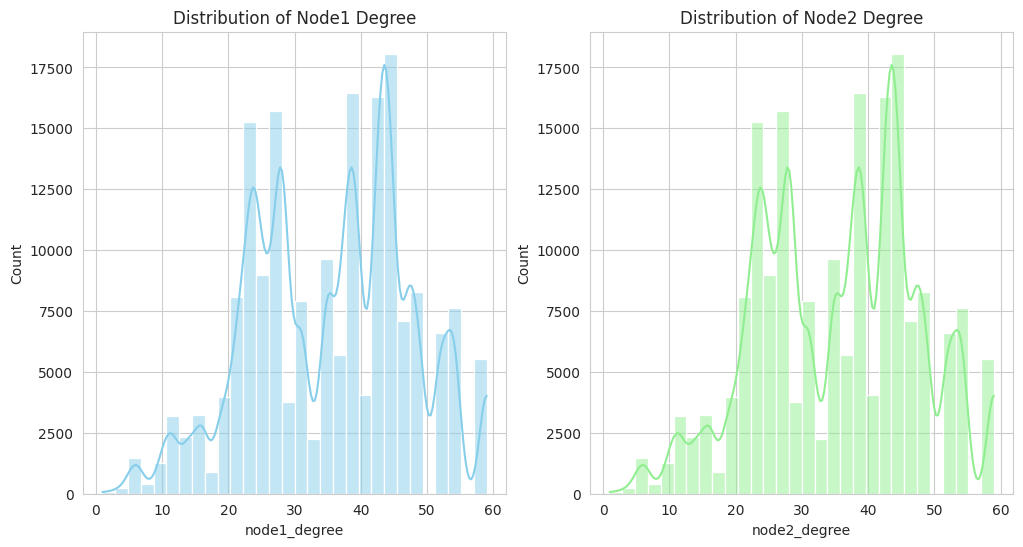

In [80]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of node degrees
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(nslc_interactions['node1_degree'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Node1 Degree')

plt.subplot(1, 2, 2)
sns.histplot(nslc_interactions['node2_degree'], bins=30, color='lightgreen', kde=True)
plt.title('Distribution of Node2 Degree')
plt.show()


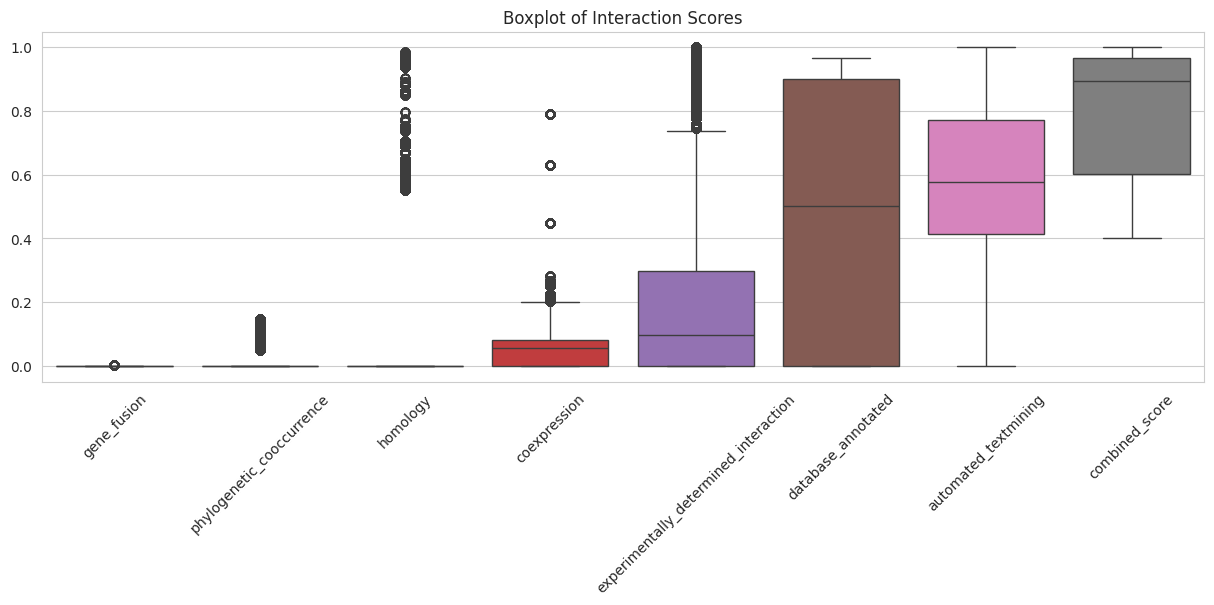

In [81]:
# Boxplot of interaction scores
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=nslc_interactions[['gene_fusion', 'phylogenetic_cooccurrence', 'homology', 'coexpression',
                     'experimentally_determined_interaction', 'database_annotated', 'automated_textmining', 'combined_score']])
plt.xticks(rotation=45)
plt.title('Boxplot of Interaction Scores')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect co

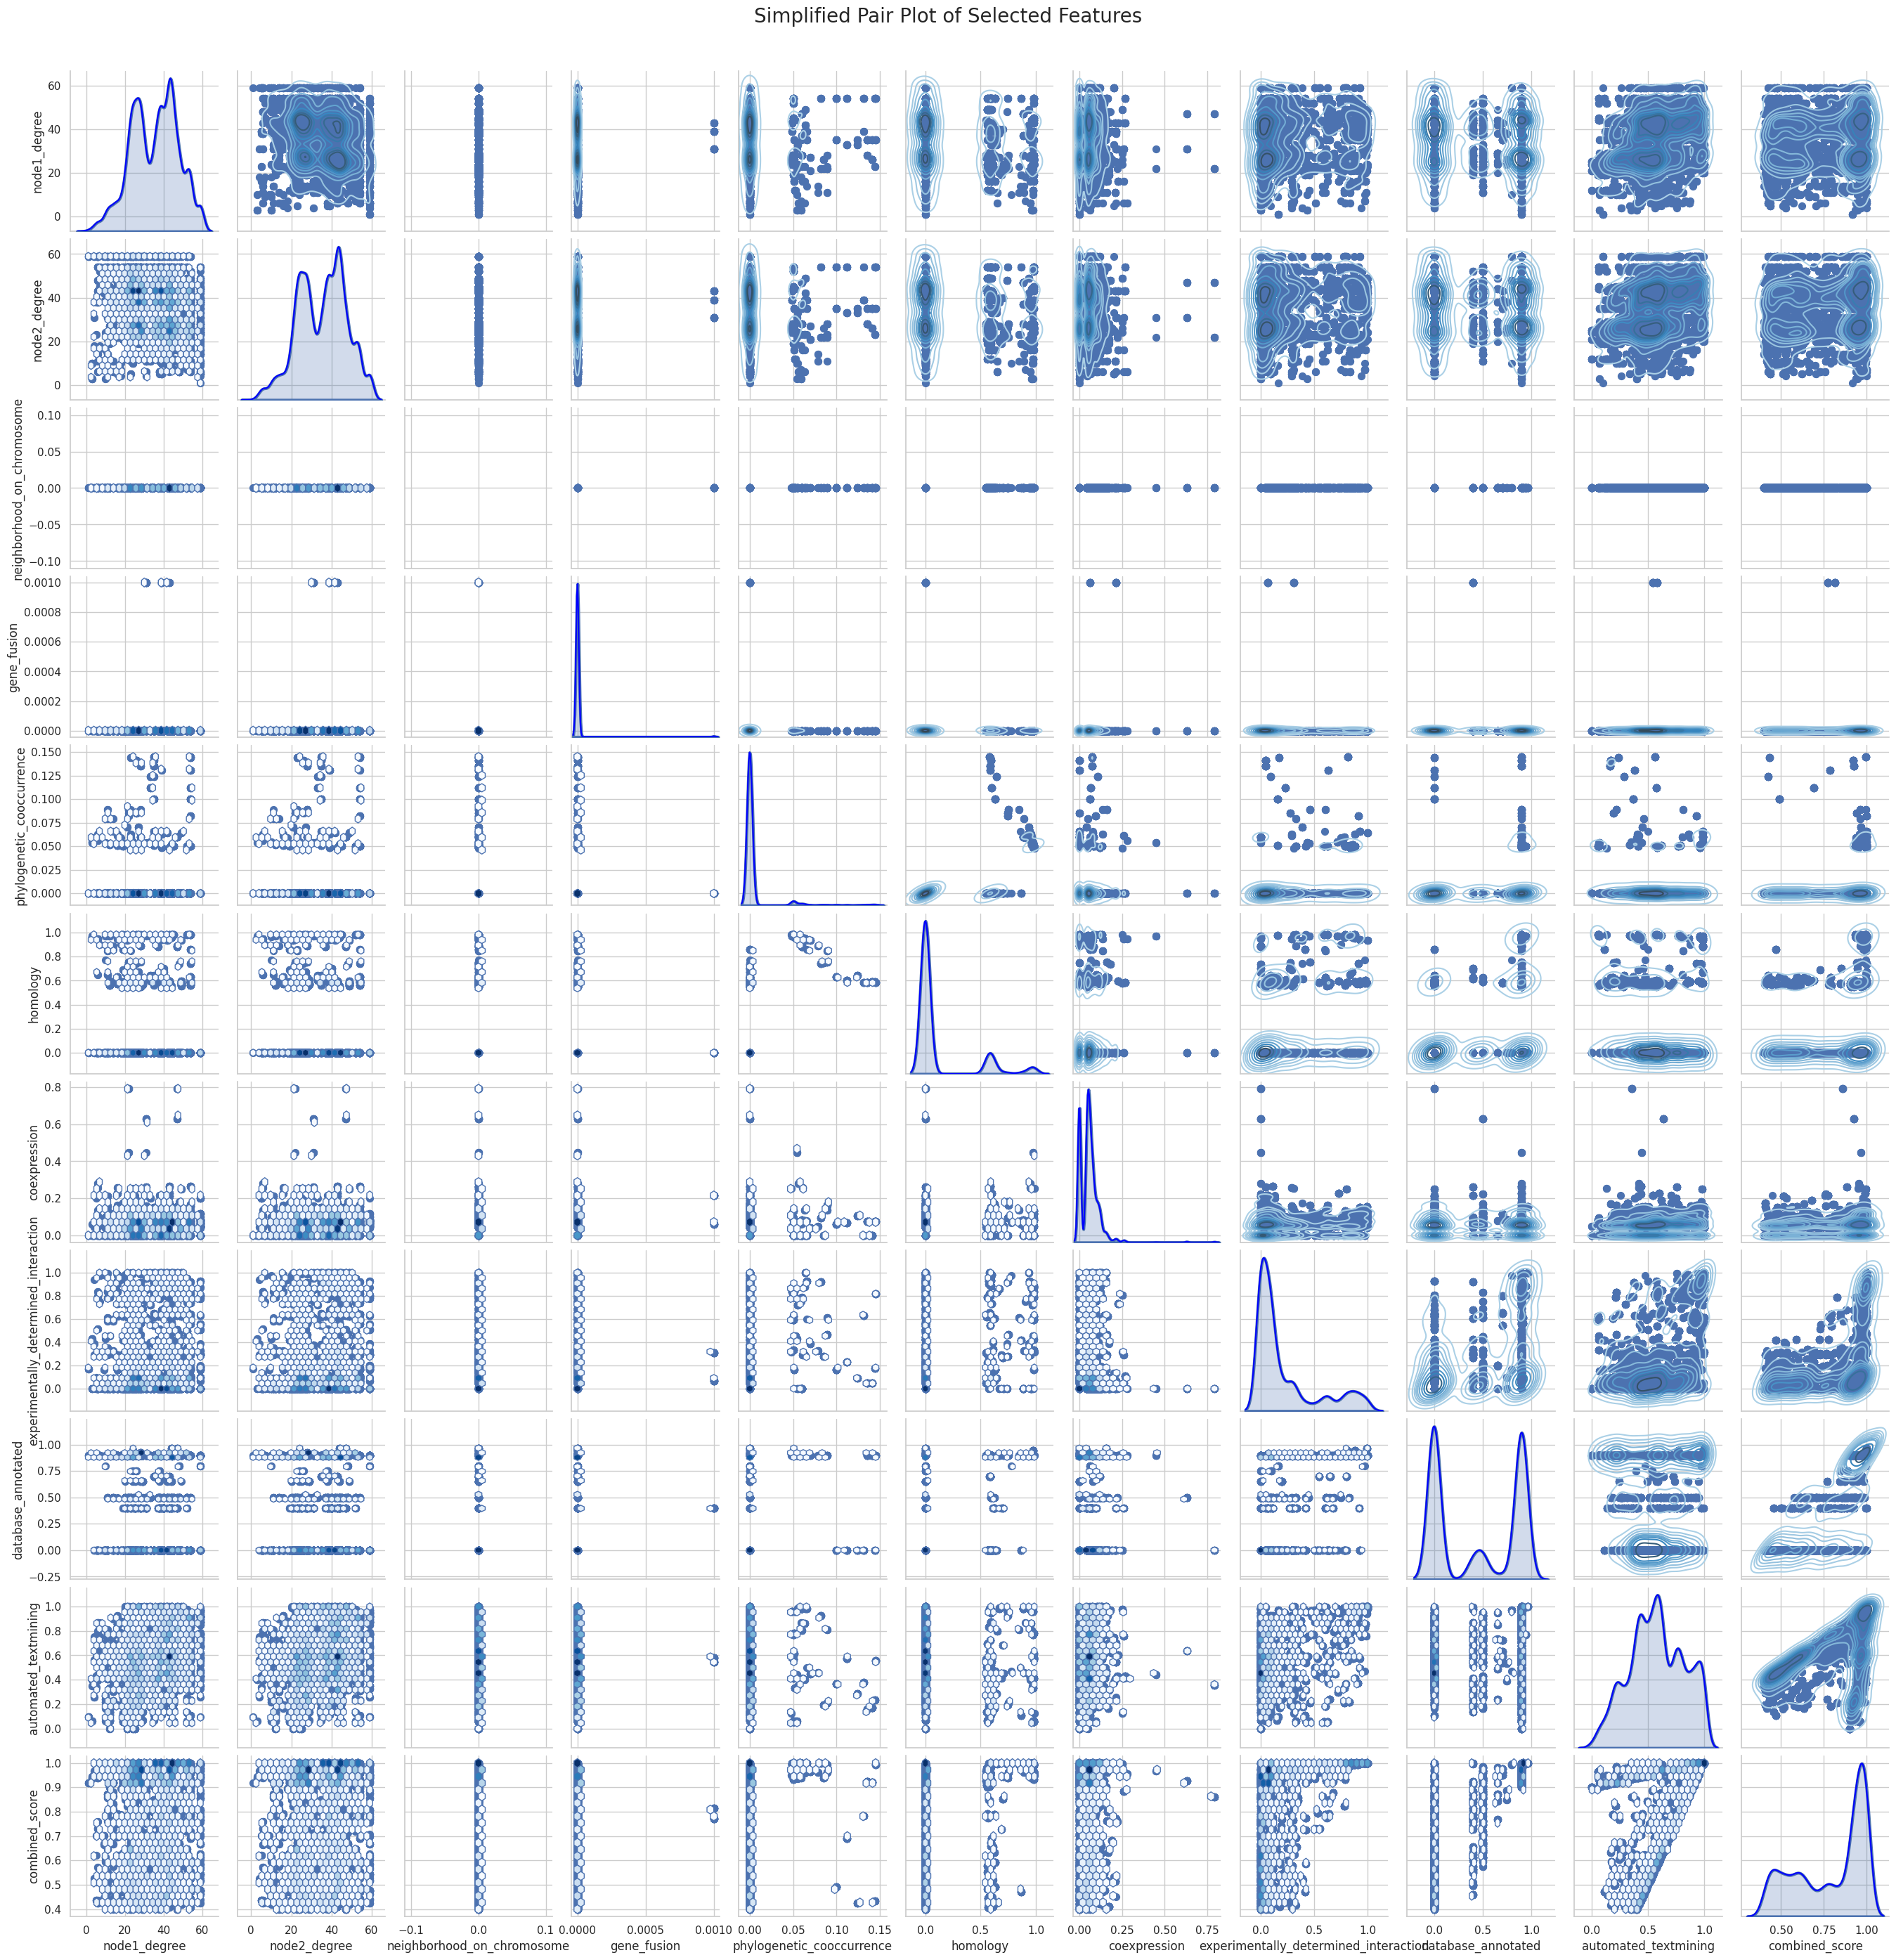

In [82]:
# Setting the style of the plots
sns.set(style="whitegrid")

# Sample a smaller fraction of the data if needed
sampled_df = nslc_interactions.sample(frac=0.05, random_state=42)  # Reduce to 5% if performance is an issue

# Optional: Stratified sampling if there's an important categorical variable
# sampled_df = nslc_interactions.groupby('category_column', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=42))

# Continue with your analysis as before
selected_columns = ['node1_degree', 'node2_degree', 'neighborhood_on_chromosome', 'gene_fusion',
                    'phylogenetic_cooccurrence', 'homology', 'coexpression',
                    'experimentally_determined_interaction', 'database_annotated',
                    'automated_textmining', 'combined_score']
filtered_df = sampled_df[selected_columns]

# Creating the pair plot
pair_plot = sns.pairplot(filtered_df,
                         kind="scatter",
                         diag_kind="kde",
                         plot_kws={'s': 50, 'edgecolor': "b", 'linewidth': 1},
                         diag_kws={'shade': True, 'linewidth': 3, 'legend': False})

# Enhancements for better visual representation
pair_plot.map_upper(sns.kdeplot, cmap="Blues_d")  # Density plot to the upper triangle
pair_plot.map_lower(plt.hexbin, gridsize=20, cmap='Blues', mincnt=1)  # Using hexbin for the lower triangle
pair_plot.map_diag(sns.kdeplot, color="blue")     # KDE plot on the diagonal with a color change

# Add a title for clarity
plt.suptitle('Simplified Pair Plot of Selected Features', size=20, y=1.02)

# Display the plot
plt.show()


**Inference -**
1. Pair Plot Analysis:
  * Node Degrees (node1_degree, node2_degree) show a somewhat linear relationship, indicating higher connectivity nodes tend to interact more.
  * Combined Score has a broad range of values, making it a strong candidate for edge weighting.
  * Gene Fusion, Phylogenetic Co-occurrence, and Homology show outliers and many zeros, suggesting less common but potentially biologically significant interactions.
  * Coexpression and Experimentally Determined Interaction have a more uniform distribution, with Experimentally Determined Interaction showing a wider spread.

2. Boxplot of Interaction Scores:
  * Experimentally Determined Interaction, Database Annotated, and Combined Scores have higher medians and broader ranges, capturing a broader spectrum of interaction strengths.
  * Gene Fusion and Phylogenetic Co-occurrence have low median values and few high outliers, potentially informative for specific interactions.
3. Columns to Use as Weights:
  * Combined Score is comprehensive and suitable for general edge weighting.
  * Experimentally Determined Interaction and Database Annotated can be used to emphasize verified or well-documented interactions.
  * Homology and Coexpression can provide specific insights for certain analyses.


We will use the Combined Score as the primary edge weight for general use.
We will the incorporate Experimentally Determined Interaction or Database Annotated scores to highlight stronger interactions in out network construction


## Network Construction with Edge Attributes:
We'll construct a network graph where edge weights represent the combined score of interactions, and we'll also display other types of interactions.

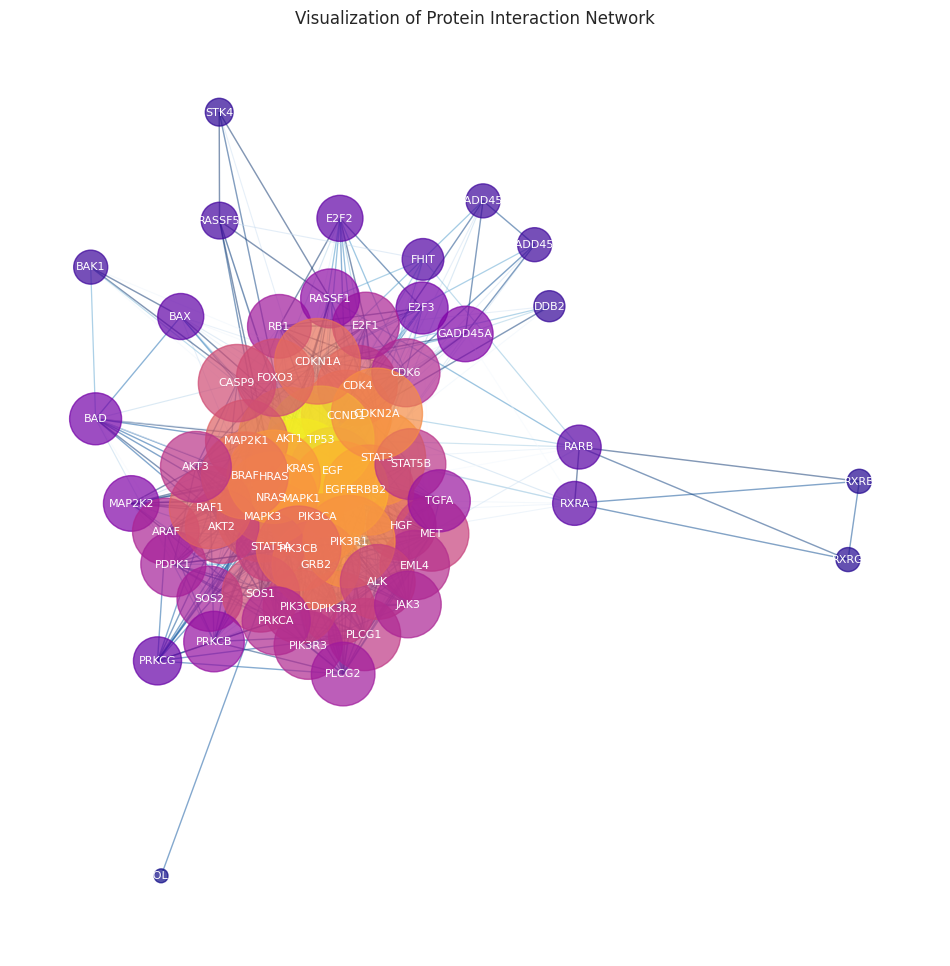

In [83]:
# Create the network graph
G = nx.from_pandas_edgelist(
    nslc_interactions,
    'node1', 'node2',
    ['combined_score', 'experimentally_determined_interaction', 'database_annotated']
)

# Define edge width and color with better scaling
edge_width = [np.log10(1 + 10 * score) for score in nx.get_edge_attributes(G, 'combined_score').values()]
edge_colors = [data['combined_score'] for _, _, data in G.edges(data=True)]

# Using degree centrality for node size
node_size = [100 * G.degree(n) for n in G]

# Choose a color map
color_map = plt.cm.plasma

# Visualize the network with custom styles
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Try different layouts like nx.kamada_kawai_layout(G)

# Draw nodes with a color scheme
node_color = [G.degree(n) for n in G]
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=color_map, alpha=0.7)

# Draw edges with dynamic widths and color based on 'combined_score'
nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_colors, edge_cmap=plt.cm.Blues, style='solid', alpha=0.5)

# Add labels and title
nx.draw_networkx_labels(G, pos, font_size=8, font_color='white')
plt.title('Visualization of Protein Interaction Network')
plt.axis('off')  # Turn off the axis
plt.show()

**Inference -**The graph provides a detailed visualization of a protein interaction network for Non-Small Cell Lung Cancer (NSCLC), emphasizing the relationships and importance of various proteins. Key aspects include:

1. **Node Representation**: Nodes symbolize proteins, with their sizes scaled by degree centrality to reflect the number of interactions each protein has. Larger nodes signify proteins with extensive connections, underscoring their significance in the network.

2. **Edge Representation**: Edges indicate protein interactions, with widths modulated logarithmically by the 'combined_score'. This scoring highlights the strength of interactions, helping to distinguish critical connections that are essential for understanding the network's structure.

3. **Edge Color**: The intensity of interactions is also shown through edge colors, with deeper shades representing stronger interactions. This color coding is based on the 'combined_score', providing a visual gradient that enhances the understanding of interaction strengths.

4. **Visualization Layout**: A spring layout is used to organize the network, facilitating a clearer view of how proteins are interconnected and which are centrally important, thus reducing visual clutter and enhancing interpretability.

Overall, this visualization leverages node size, edge width, and color to illustrate the intricate interactions within the NSCLC protein network, focusing on the centrality and strength of protein interactions. This approach not only clarifies the complex protein relationships but also aids in identifying key proteins and interactions within the network.

### Centrality Measures :
We will calculate centrality to find key nodes and create subnetworks of these central nodes for detailed analysis.

In [84]:
# Function to print the top 10 nodes for a given centrality measure
def print_top_10(centrality, centrality_name):
    central_nodes = sorted(centrality, key=centrality.get, reverse=True)
    print(f"Top 10 central nodes in the network based on {centrality_name}:")
    for node in central_nodes[:10]:
        print(f"{node}: {centrality[node]}")
    print()  # add a blank line for better readability between sections

In [85]:
# Calculating centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)  # may require more iterations depending on the network

#### 1. Degree Centrality -
* Degree centrality measures the number of edges attached to each node. In terms of a protein interaction network, it quantifies how many connections (or interactions) each protein has.<br>
* Proteins with high degree centrality are likely essential for cellular processes since they interact with many other proteins. They might be involved in key pathways or crucial for maintaining network stability.

In [86]:
# Print top 10 nodes for each centrality measure
print_top_10(degree_centrality, "Degree Centrality")

Top 10 central nodes in the network based on Degree Centrality:
TP53: 0.8805970149253731
AKT1: 0.8059701492537313
KRAS: 0.7761194029850746
EGFR: 0.7313432835820896
STAT3: 0.7164179104477612
PIK3CA: 0.7014925373134329
HRAS: 0.6716417910447761
NRAS: 0.6567164179104478
PIK3R1: 0.6567164179104478
MAPK3: 0.6417910447761194



#### 2. Closeness Centrality -
* Closeness centrality measures how close a node is to all other nodes in the network. It's calculated as the reciprocal of the sum of the shortest path distances from the node to all other nodes.
* Proteins with high closeness centrality can quickly interact or influence other proteins across the network, potentially indicating their role in signal transduction or their efficiency in propagating information through a cellular network.


In [87]:
print_top_10(closeness_centrality, "Closeness Centrality")

Top 10 central nodes in the network based on Closeness Centrality:
TP53: 0.8933333333333333
AKT1: 0.8375
KRAS: 0.7976190476190477
EGFR: 0.788235294117647
STAT3: 0.7790697674418605
PIK3CA: 0.7528089887640449
PIK3R1: 0.7444444444444445
MAPK3: 0.7362637362637363
HRAS: 0.7362637362637363
CDKN2A: 0.7362637362637363



#### 3. Betweenness Centrality -
* Betweenness centrality quantifies how often a node appears on the shortest paths between other nodes. It highlights nodes that serve as bridges.
* Proteins with high betweenness centrality might control the flow of information or substances within the cell, acting as gatekeepers. They could be potential drug targets because their removal or modification can significantly impact the network's function.


In [88]:
print_top_10(betweenness_centrality, "Betweenness Centrality")

Top 10 central nodes in the network based on Betweenness Centrality:
TP53: 0.12916932121438954
AKT1: 0.055528726965308785
STAT3: 0.04100007247955556
KRAS: 0.0309359790902557
RXRA: 0.030673222701716598
EGFR: 0.029874041443926715
CDKN2A: 0.029363560950295995
RARB: 0.028778738321126294
CDKN1A: 0.024094675971163222
MAPK1: 0.0226735080644186



#### 4. Eigenvector Centrality -
* Eigenvector centrality considers a node's connections and its neighbors' influence. A node is considered highly influential if it is connected to many nodes who themselves have high scores.
* This centrality measure helps identify not just well-connected proteins, but those whose connections are also influential. Such proteins might be crucial for the robustness of cellular responses and are often core components of critical pathways.

In [89]:
print_top_10(eigenvector_centrality, "Eigenvector Centrality")

Top 10 central nodes in the network based on Eigenvector Centrality:
TP53: 0.19964673463259303
KRAS: 0.19855236428641035
AKT1: 0.19643618667712515
PIK3CA: 0.18949036594556934
EGFR: 0.18838294417984072
STAT3: 0.18318004245950548
PIK3R1: 0.18063498415094545
HRAS: 0.1793816799120391
NRAS: 0.17637835795329168
ERBB2: 0.16941476064804914



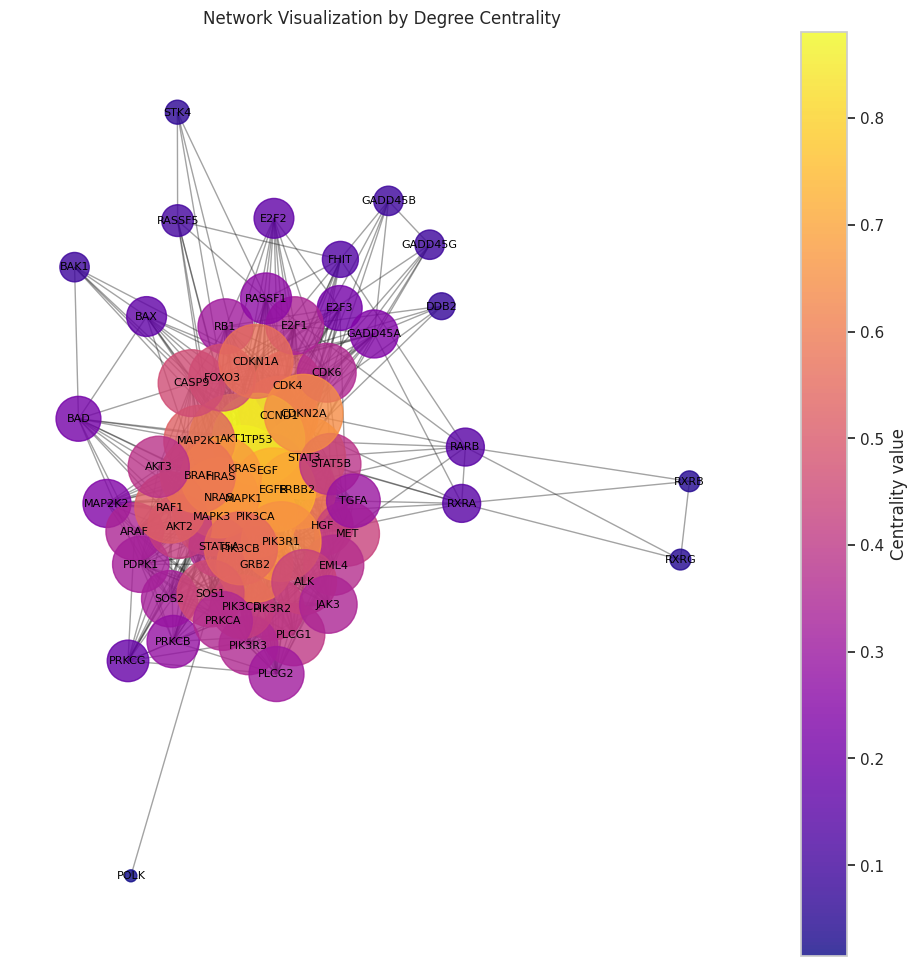

In [90]:
# Assuming 'G' is your already created graph object

def draw_network(G, centrality, title, color_map=plt.cm.plasma):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # Node position layout for consistency

    # Drawing nodes with size and color based on centrality measure
    nodes = nx.draw_networkx_nodes(G, pos, node_size=[v * 5000 for v in centrality.values()],
                                   node_color=list(centrality.values()),
                                   cmap=color_map, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

    plt.colorbar(nodes, label='Centrality value')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage with degree centrality
degree_centrality = nx.degree_centrality(G)
draw_network(G, degree_centrality, "Network Visualization by Degree Centrality")


**Inference -**

- **Highly Central Proteins**: The graph highlights key proteins like TP53, AKT1, and KRAS as having high degree centrality. These proteins are crucial due to their numerous connections to other proteins.

- **Indicators of Role**: Brighter colors and larger sizes on the graph represent the centrality of these proteins, emphasizing their significant roles in cellular processes.

- **Central Regulators**: These key proteins appear to be central regulators within the network, suggesting their importance in maintaining cellular functions.

- **Potential Research and Therapeutic Targets**: The central nature of these proteins makes them important targets for further biological research and potential therapeutic interventions.

- **Network Vulnerability**: The network shows a structure with several hubs (highly connected proteins) surrounded by less connected nodes. This could indicate a vulnerability where disturbances in key proteins could significantly impact the entire network.

- **Importance for Biological Understanding**: Analyzing the centrality of these proteins is vital for understanding biological pathways and mechanisms, particularly in the context of diseases.

## Conclusion -


### Project Findings Highlights

1. **Central Protein Identification**: The project successfully identified key proteins such as TP53, AKT1, and KRAS, which exhibit high centrality scores. These proteins are critical due to their extensive interactions within the network.

2. **Functional Insights**: The analysis revealed that proteins with high centrality are likely crucial for numerous cellular functions, potentially acting as hubs in essential biological pathways.

3. **Potential Therapeutic Targets**: Centrality analysis pinpointed proteins that could be effective targets for therapeutic interventions, particularly those with high betweenness centrality, indicating their role as connectors or bridges within the network.

4. **Network Vulnerability**: The structure of the network, characterized by a few highly connected nodes (hubs) surrounded by less connected nodes, suggests a vulnerability where targeting or modifying key proteins could have significant impacts on the network's overall functionality.

5. **Visual Analytics**: Through detailed visualizations, the project effectively demonstrated the network's structure and the relative importance of various proteins, aiding in the intuitive understanding and communication of complex data.

These findings not only enhance our understanding of protein interaction networks but also open avenues for targeted research and therapeutic strategies based on the structural and functional properties of the network.